#### Autoregressive model 
An autoregressive model, or AR model, is a linear predictive model that uses past data to predict future trends. For example, an autoregressive model might continually integrate stock market data into its algorithm to provide updated forecasts for future prices.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [8]:
raw_df = pd.read_csv('./datasets/TSLA.csv')

In [14]:
df = raw_df.loc[:,['Date', 'Close']]

In [16]:
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [18]:
df.shape

(758, 2)

<Axes: >

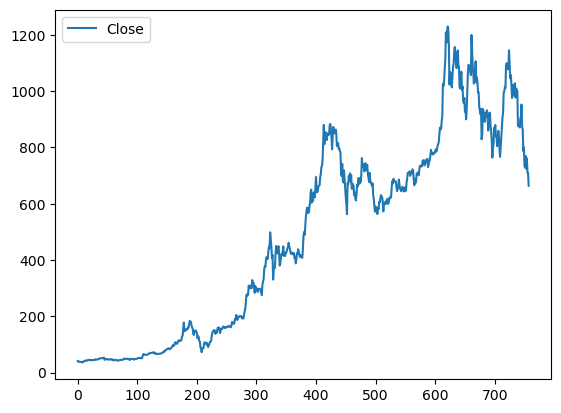

In [19]:
df.plot()

In [20]:
#adfuller Test
X = df['Close'].values
result = adfuller(X)
print('ADF Statistics ', result[0])

ADF Statistics  -1.3630085817037487


c:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


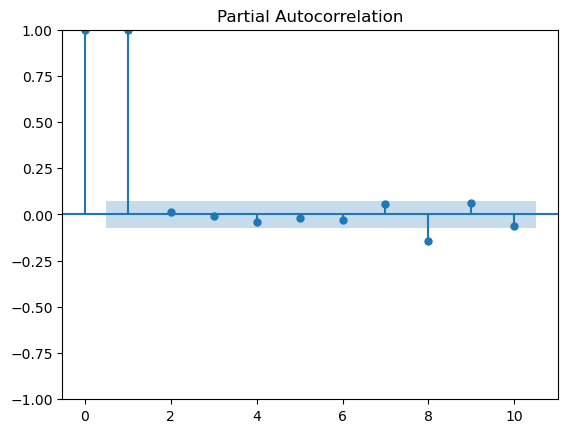

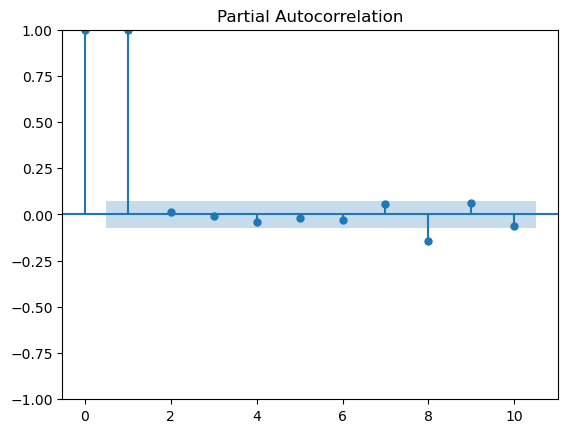

In [21]:
plot_pacf(X, lags= 10)

In [22]:
df['Shifted_value'] = df['Close'].shift()

In [23]:
df.head()

,Date,Close,Shifted_value
0,2019-05-21,41.015999,NaN
1,2019-05-22,38.546001,41.015999
2,2019-05-23,39.098000,38.546001
3,2019-05-24,38.125999,39.098000
4,2019-05-28,37.740002,38.125999


In [25]:
df.dropna(inplace=True)
df.head()

,Date,Close,Shifted_value
1,2019-05-22,38.546001,41.015999
2,2019-05-23,39.098000,38.546001
3,2019-05-24,38.125999,39.098000
4,2019-05-28,37.740002,38.125999
5,2019-05-29,37.972000,37.740002


In [37]:
X = df['Shifted_value']
y = df['Close']

train_size = int(len(X) * 0.80)

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]


X_train= X_train.to_numpy()
X_test = X_test.to_numpy()

y_train= y_train.to_numpy()
y_test = y_test.to_numpy()
X_train.shape

(605,)

In [38]:
X_train= X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train= y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

X_train.shape

(605, 1)

In [39]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [40]:
linear_regression.coef_

array([[0.99927514]])

In [41]:
linear_regression.intercept_

array([1.5366151])

In [42]:
y_pred = linear_regression.predict(X_test)

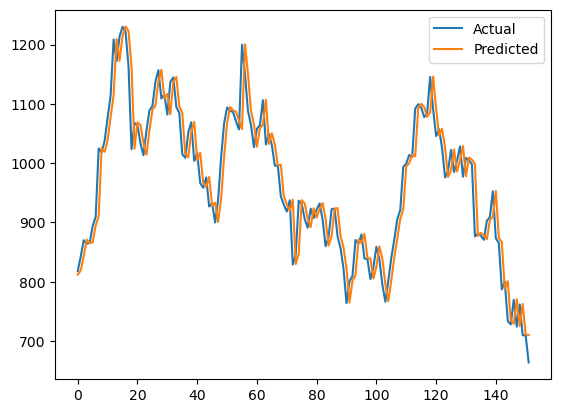

In [53]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predicted")
plt.legend()
plt.show()

In [49]:
model  = ARIMA(y_train,order =  (1,0,0))

In [52]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  605
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2558.461
Date:                Sun, 30 Jun 2024   AIC                           5122.923
Time:                        21:49:48   BIC                           5136.138
Sample:                             0   HQIC                          5128.065
                                - 605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.2758    373.671      0.978      0.328    -367.106    1097.658
ar.L1          0.9989      0.003    377.242      0.000       0.994       1.004
sigma2       273.0777      7.584     36.008      0.0